# Introduction to plotting 

In [1]:
import b2plot
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "lines.lw" on line 23 in
/afs/desy.de/user/s/swehle/.config/matplotlib/stylelib/belle2_wg1.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/cvmfs/belle.cern.ch/el7/externals/v01-07-01/Linux_x86_64/common/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /afs/desy.de/user/s/swehle/.config/matplotlib/stylelib/belle2_wg1.mplstyle: Bad val "12," on line #14
	"axes.labelsize              : 12,
"
	in file "/afs/desy.de/user/s/swehle/.config/matplotlib/stylelib/belle2_wg1.mplstyle"
	Key axes.labelsize: 12, is not a valid font size. Valid font sizes are xx-small, x-small, small, medium, large, x-large, xx-large, smaller, larger.
  styles = read_style_directory(stylelib_path)
/cvmfs/belle.cern.ch/el7/externals/v01-07-01/Linux_x86_64/common/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /afs/desy.de/u

For optimal usage set `plt.style.use('belle2')`


In [4]:
plt.style.reload_library()


Bad key "lines.lw" on line 23 in
/afs/desy.de/user/s/swehle/.config/matplotlib/stylelib/belle2_wg1.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/cvmfs/belle.cern.ch/el7/externals/v01-07-01/Linux_x86_64/common/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /afs/desy.de/user/s/swehle/.config/matplotlib/stylelib/belle2_wg1.mplstyle: Bad val "cycler('color', ['" on line #16
	"axes.prop_cycle             : cycler('color', ['#3465a4', '#f57900', '#73d216', '#cc0000', '#75507b', '#c17d11', '#edd400', '#555753', '#d3d7cf'])
"
	in file "/afs/desy.de/user/s/swehle/.config/matplotlib/stylelib/belle2_wg1.mplstyle"
	Key axes.prop_cycle: 'cycler('color', ['' is not a valid cycler construction: EOL while scanning string literal (<string>, line 1)
  styles = read_style_directory(stylelib_path)
/cvmfs/belle.cern.ch/el7/externals/v01-07-

In [2]:
plt.style.use('belle2')

In [3]:
%load_ext autoreload
%autoreload 2

### Creating some pseudo data

In [4]:
import pandas as pd
import numpy as np

ns =30000
nb =80000

df = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.normal(0, 0.5, ns))}
df['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df['exp'] = np.random.randint(0,8, ns+nb)
df['gauss'] = np.append(np.random.random_sample(nb)*7 - 3.5, np.random.normal(-1, 0.5, ns))

df = pd.DataFrame(df)

df1 = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.random_sample(ns)*7 - 3.5 )}
df1['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df1 = pd.DataFrame(df1)

# Simple Plot

[]

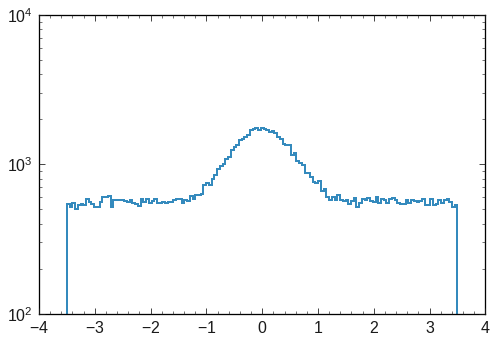

In [10]:
_ = b2plot.hist(df.mass, lw=2)
plt.semilogy()

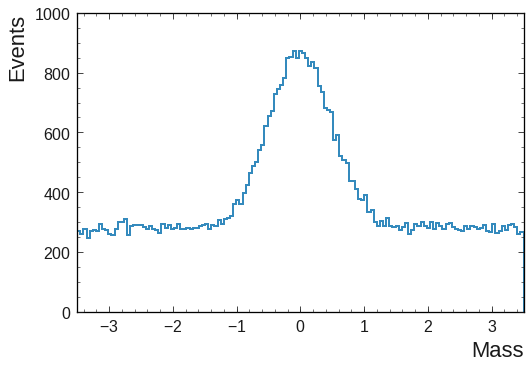

In [5]:
b2plot.hist(df.mass, lw=2, scale=0.5, weights=np.random.normal(1,0.1,len(df)))
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

In [37]:
isinstance(1, bool)

[autoreload of b2plot.functions failed: Traceback (most recent call last):
  File "/home/share/basf2/externals/v01-05-02/Linux_x86_64/common/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/afs/desy.de/user/s/swehle/Tools/b2plot/src/b2plot/functions.py", line 92
    if isinstance(scale, )
                         ^
SyntaxError: invalid syntax
]


False

In [ ]:
b2plot.figure()
b2plot.hist(df.mass, color=1, style=0)
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

In [ ]:
xx = df.sample(50).mass
# b2plot.figure()
b2plot.errorbar(xx, color='black')
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV', root_style=1)

In [ ]:
b2plot.errorbar(xx, box=True)
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV',root_style=1)

# Several Distrtibutions

In [ ]:
b2plot.hist(df.mass,  style=0,)

b2plot.hist(df1.mass,  lw=2)

b2plot.xlim()
b2plot.labels("Mass", "Events",'' )

In [ ]:
b2plot.sig_bkg_plot(df, "mass", 'sig')

In [ ]:
b2plot.figure()
b2plot.hist(df[df.sig==1].mass,  style=0, color=0, range=(-3,3), label='Signal')
b2plot.hist(df1.mass,  style=1, color=1, label='MC1')
b2plot.hist(np.random.normal(-3,1, 10000), style=2, color=3, label='NP')
b2plot.xlim()
plt.legend()
b2plot.labels("Mass", "Events",'GeV' ,1)

In [ ]:
b2plot.stacked(df, "mass", 'exp', bins=50, lw=.25)
# b2plot.errorbar(df1.mass, color='black')
b2plot.xlim()

In [ ]:
b2plot.stacked([df[df.exp==2].mass, 
                df[df.exp==3].mass], 
               bins=50, lw=.25)
# b2plot.errorbar(df1.mass, color='black')
b2plot.xlim()

In [ ]:
b2plot.stacked(df, "mass", 'exp', bins=50, color=b2plot.b2helix(8), label=range(8))
b2plot.errorbar(df.mass.values, color='black', weights=np.random.normal(1.01,0.9, len(df)), label="Data")
b2plot.xlim()
plt.legend()
b2plot.labels("$M$", "Events", 'GeV', 1)

In [ ]:
from b2plot.analysis import plot_flatness


In [ ]:
with plt.style.context(('belle2_modern')):
    b2plot.figure()
    plot_flatness(df.mass, df.gauss, xrange= (-4,3))
    b2plot.xlim()

/cvmfs/belle.cern.ch/sl6/externals/v01-06-01/Linux_x86_64/common/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


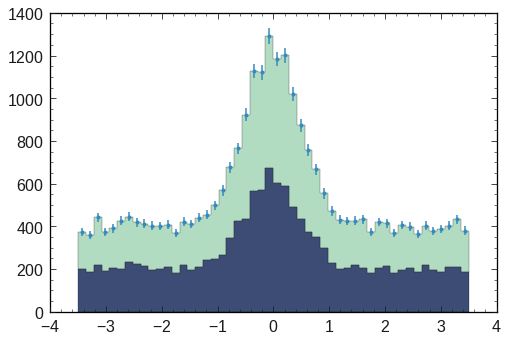

In [27]:
y,x,h = b2plot.stacked([df[df.exp==2].mass, 
                df[df.exp==3].mass], 
               bins=50, lw=.25)
b2plot.errorbar((x[:-1]+ x[1:])/2, y, np.sqrt(y) )

In [21]:
len(np.sqrt(y))

50

In [18]:
len(y)

50

In [26]:
(x[:-1]+ x[1:])/2

array([-3.42914666, -3.28921358, -3.1492805 , -3.00934742, -2.86941434,
       -2.72948126, -2.58954818, -2.4496151 , -2.30968203, -2.16974895,
       -2.02981587, -1.88988279, -1.74994971, -1.61001663, -1.47008355,
       -1.33015047, -1.19021739, -1.05028432, -0.91035124, -0.77041816,
       -0.63048508, -0.490552  , -0.35061892, -0.21068584, -0.07075276,
        0.06918032,  0.20911339,  0.34904647,  0.48897955,  0.62891263,
        0.76884571,  0.90877879,  1.04871187,  1.18864495,  1.32857803,
        1.4685111 ,  1.60844418,  1.74837726,  1.88831034,  2.02824342,
        2.1681765 ,  2.30810958,  2.44804266,  2.58797573,  2.72790881,
        2.86784189,  3.00777497,  3.14770805,  3.28764113,  3.42757421])

In [ ]:
x[:]

In [1]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = -0.4 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]